In [142]:
import pandas as pd
import altair as alt
import datetime
import geopy.distance
import matplotlib.pyplot as plt

# bigquery-public-data.san_francisco_bikeshare.bikeshare_trips

In [87]:
bikeshare_sf_trips = pd.read_csv('bigquery-public-data.san_francisco_bikeshare.bikeshare_trips.csv')

C:\Users\zeala\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (0,9,17,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [151]:
bikeshare_sf_trips.head(5)

,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,zip_code,...,c_subscription_type,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_gender,bike_share_for_all_trip,start_station_geom,end_station_geom
0,22392018022821021100,94,2018-02-28 21:02:11 UTC,San Salvador St at 9th St,317,2018-02-28 21:03:46 UTC,5th St at San Salvador St,327,2239,NaN,...,Subscriber,37.333955,-121.877349,37.332039,-121.881766,1993.0,Male,Yes,POINT(-121.877349 37.333955),POINT(-121.881766319275 37.3320386809513)
1,112018022820431100,515,2018-02-28 20:43:11 UTC,59th St at Horton St,153,2018-02-28 20:51:46 UTC,Genoa St at 55th St,189,11,NaN,...,Subscriber,37.840945,-122.291360,37.839649,-122.271756,1990.0,Male,No,POINT(-122.2913604 37.8409452),POINT(-122.2717561 37.8396488)
2,23372018022820395400,560,2018-02-28 20:39:54 UTC,59th St at Horton St,153,2018-02-28 20:49:14 UTC,32nd St at Adeline St,213,2337,NaN,...,Subscriber,37.840945,-122.291360,37.823847,-122.281193,1988.0,Male,No,POINT(-122.2913604 37.8409452),POINT(-122.2811926 37.8238474)
3,8182018022820330400,345,2018-02-28 20:33:04 UTC,Telegraph Ave at 19th St,183,2018-02-28 20:38:49 UTC,Washington St at 8th St,202,818,NaN,...,Subscriber,37.808702,-122.269927,37.800754,-122.274894,1984.0,Male,No,POINT(-122.2699271 37.8087021),POINT(-122.2748943 37.8007544)
4,1822018022819361800,299,2018-02-28 19:36:18 UTC,Fulton St at Bancroft Way,247,2018-02-28 19:41:17 UTC,Bancroft Way at Telegraph Ave,239,182,NaN,...,Subscriber,37.867789,-122.265896,37.868813,-122.258764,1977.0,Female,Yes,POINT(-122.2658964 37.8677892),POINT(-122.258764 37.8688126)


# Are the number of bikeshare rides declining?

In [89]:
ride_dates = bikeshare_sf_trips[['trip_id', 'start_date']]
ride_dates = ride_dates.astype({"trip_id": str, "start_date": str})
ride_dates['start_date_time'] = ride_dates['start_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S UTC"))
ride_dates['start_date_only'] = ride_dates['start_date_time'].apply(lambda x: x.date())
ride_dates['year'] = ride_dates['start_date_time'].apply(lambda x: x.year)
ride_dates = ride_dates[ride_dates['year'] >= 2017]

In [90]:
plot1_df = pd.DataFrame(ride_dates.groupby('start_date_only')['trip_id'].nunique()).reset_index()

In [91]:
plot1_df["start_date_only"] = pd.to_datetime(plot1_df["start_date_only"])
alt.Chart(plot1_df).mark_line().encode(
    x='start_date_only',
    y='trip_id'
).properties(
    width=1000,
    height=300
)

alt.Chart(...)

No. Also check for other cities.

# What stations are most common?

In [98]:
stations = bikeshare_sf_trips[['trip_id', 'start_station_name']]
stations = stations.astype({"trip_id": str, "start_station_name": str})
stations = pd.DataFrame(bikeshare_sf_trips.groupby('start_station_name')['trip_id'].nunique()).reset_index()
stations.sort_values('trip_id', ascending = False).head(10)

,start_station_name,trip_id
290,San Francisco Caltrain (Townsend at 4th),72683
291,San Francisco Caltrain 2 (330 Townsend),56100
177,Harry Bridges Plaza (Ferry Building),49062
137,Embarcadero at Sansome,41137
39,2nd at Townsend,39936
341,Temporary Transbay Terminal (Howard at Beale),39199
332,Steuart at Market,38531
221,Market at Sansome,35142
349,Townsend at 7th,34894
219,Market at 10th,30209


In [99]:
stations = bikeshare_sf_trips[['trip_id', 'end_station_name']]
stations = stations.astype({"trip_id": str, "end_station_name": str})
stations = pd.DataFrame(stations.groupby('end_station_name')['trip_id'].nunique()).reset_index()
stations.sort_values('trip_id', ascending = False).head(10)

,end_station_name,trip_id
290,San Francisco Caltrain (Townsend at 4th),92014
291,San Francisco Caltrain 2 (330 Townsend),58713
177,Harry Bridges Plaza (Ferry Building),50185
137,Embarcadero at Sansome,46197
39,2nd at Townsend,44145
221,Market at Sansome,40956
332,Steuart at Market,39598
349,Townsend at 7th,38545
341,Temporary Transbay Terminal (Howard at Beale),35477
289,San Francisco Caltrain (Townsend St at 4th St),30160


will need to filter by year

# More rides by subscribers?

In [100]:
subscribers = bikeshare_sf_trips[['trip_id', 'subscriber_type']]
subscribers = subscribers.astype({"trip_id": str, "subscriber_type": str})
subscribers= pd.DataFrame(subscribers.groupby('subscriber_type')['trip_id'].nunique()).reset_index()
subscribers.sort_values('trip_id', ascending = False).head(10)

,subscriber_type,trip_id
1,Subscriber,1635446
0,Customer,311971


# Average distance

In [139]:
from geopy.distance import great_circle
from geopy.distance import geodesic

In [141]:
start_points = [str(x)[6:-1].split() for x in bikeshare_sf_trips['start_station_geom'].dropna()]
end_points = [str(x)[6:-1].split() for x in bikeshare_sf_trips['end_station_geom'].dropna()]
# for point in start_points:
#     print(point)
#     x = point
#     print((float(x[0]), float(x[1])))
start_points = [(float(x[1]), float(x[0])) for x in start_points]
end_points = [(float(x[1]), float(x[0])) for x in end_points]
distances = []
for start, end in zip(start_points, end_points):
    distances.append(geodesic(start, end).meters)
#distances['distance'] = distances.apply(lambda row: geopy.distance.vecinity(row.start_point, row.start_point).km, axis=1)

(array([3.0243e+04, 4.7450e+03, 1.9482e+04, 3.6413e+04, 5.0707e+04,
        6.6702e+04, 6.5465e+04, 6.9963e+04, 6.2716e+04, 6.1840e+04,
        6.2775e+04, 5.6939e+04, 4.8517e+04, 4.1007e+04, 3.4670e+04,
        4.2853e+04, 2.5981e+04, 2.4572e+04, 1.8443e+04, 1.8687e+04,
        1.6819e+04, 1.3388e+04, 1.1416e+04, 1.1542e+04, 1.1329e+04,
        7.4320e+03, 7.9880e+03, 7.3680e+03, 5.1920e+03, 5.1200e+03,
        3.8380e+03, 3.8680e+03, 2.9980e+03, 2.2030e+03, 1.9640e+03,
        1.1350e+03, 1.4540e+03, 1.2590e+03, 9.3500e+02, 4.2600e+02,
        5.3800e+02, 4.7100e+02, 3.6600e+02, 2.9700e+02, 2.3800e+02,
        1.0400e+02, 1.9400e+02, 2.0500e+02, 1.4100e+02, 1.5300e+02,
        1.5400e+02, 4.6000e+01, 5.0000e+01, 6.1000e+01, 2.2000e+01,
        3.9000e+01, 6.0000e+01, 1.8000e+01, 3.1000e+01, 1.6000e+01,
        8.0000e+00, 2.8000e+01, 1.0000e+00, 1.1000e+01, 4.0000e+00,
        2.0000e+00, 1.0000e+01, 6.0000e+00, 0.0000e+00, 7.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 5.00

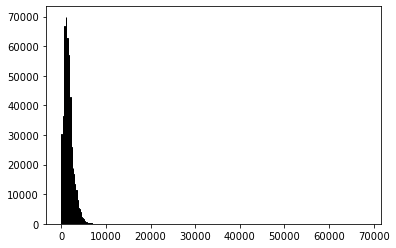

In [145]:
plt.hist(distances, bins=500, edgecolor='black')

In [147]:
pd.DataFrame(distances).describe()

,0
count,963771.000000
mean,1589.471282
std,1010.661320
min,0.000000
25%,889.221827
50%,1390.244039
75%,2075.270777
max,68196.422814
